# ДЗ 1. Введение в спортивный анализ данных, EDA

In [1]:
# !pip install missingno

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

import scipy.stats as st
from scipy.stats import probplot, ks_2samp

import missingno as msno
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [57]:
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# большая чёткость графиков
#%config InlineBackend.figure_format = 'svg'
plt.savefig("High resoltion.png",dpi=600)
import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb

<Figure size 432x288 with 0 Axes>

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Базовый анализ данных

**Задание 1:** Сделать базовый анализ данных:  
- вывести размерность датасетов, 
- посчитать базовые статистики, 
- выполнить анализ пропусков, 
- сделать выводы.

**Обзор данных**

In [4]:
train.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [5]:
train.tail(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [6]:
test.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


In [7]:
test.tail(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122
199999,test_199999,10.4664,1.8070,10.2277,6.0654,10.0258,1.0789,4.8879,14.4892,-0.5902,...,0.1398,9.2828,1.3601,4.8985,20.0926,-1.3048,-2.5981,10.3378,14.3340,-7.7094


**Размерность датасетов**

In [8]:
train.shape, test.shape

((200000, 202), (200000, 201))

**Базовые статистики**

In [9]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


**Анализ пропусков**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [12]:
# Количество переменных с пропусками
len(train.columns[train.isnull().any()])

0

<AxesSubplot:>

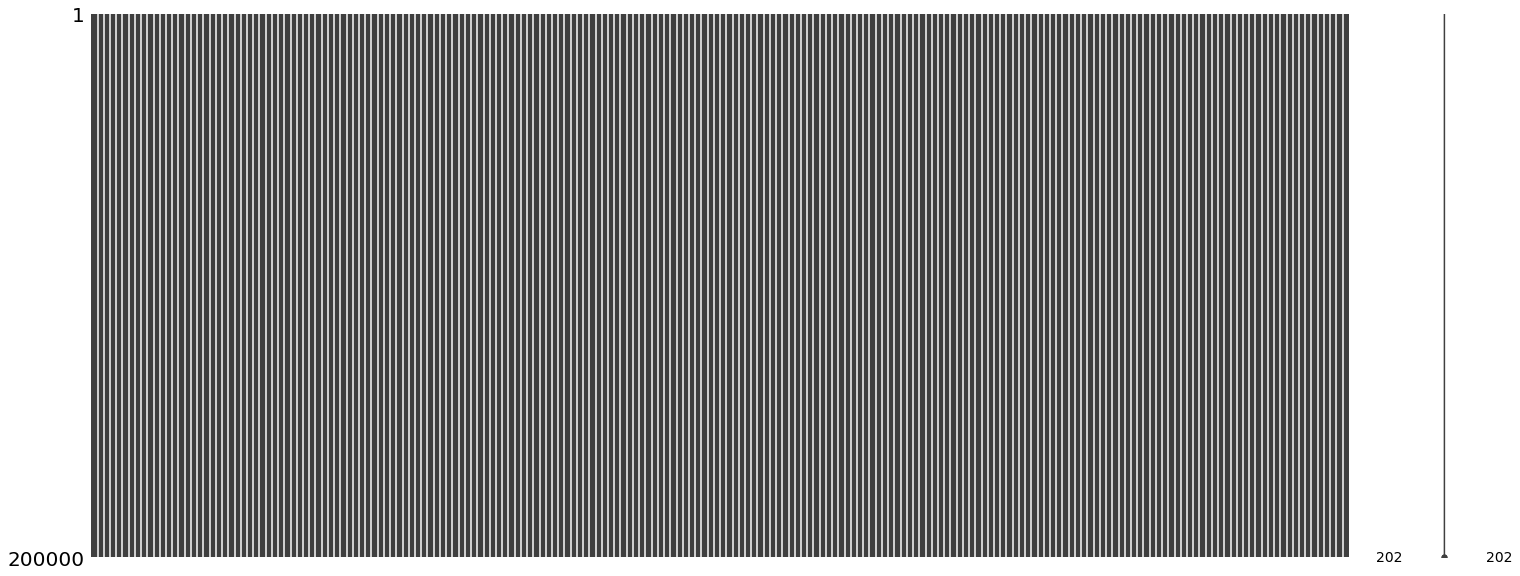

In [13]:
msno.matrix(train)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [15]:
# Количество переменных с пропусками
len(test.columns[test.isnull().any()])

0

<AxesSubplot:>

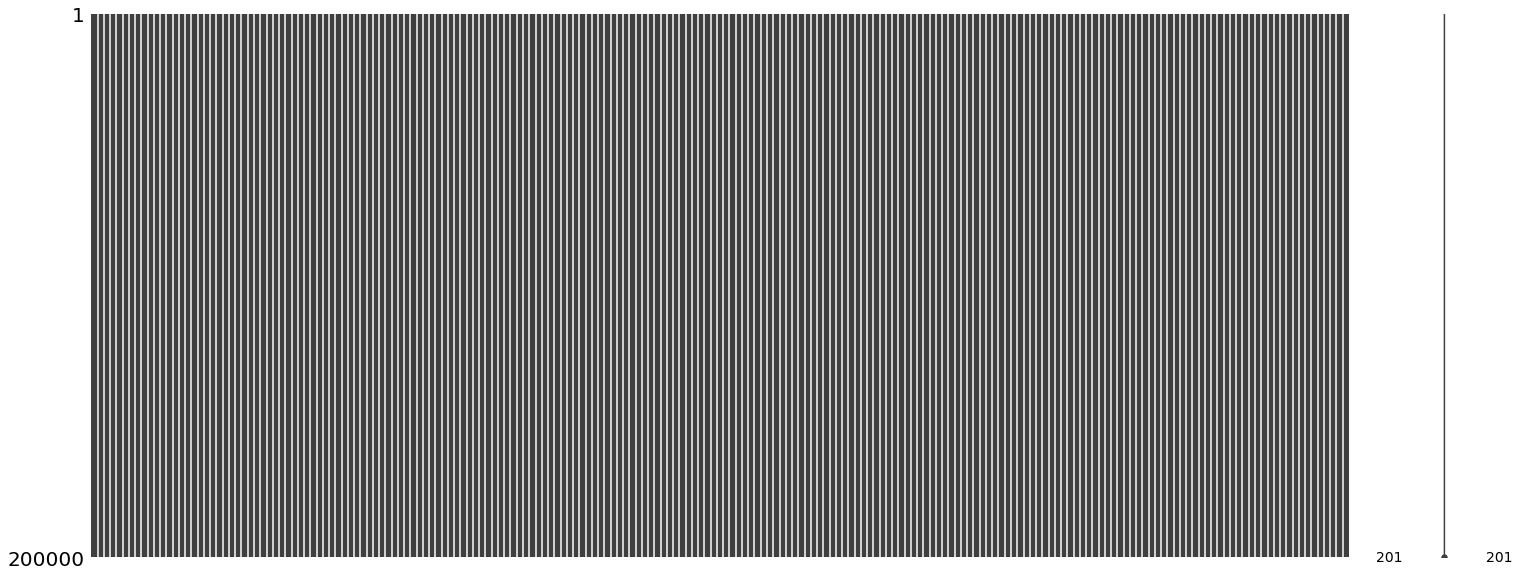

In [16]:
msno.matrix(test)

**Выводы:**  

- выборки одинаковые по размеру (без учета целевой переменной в train)  
- все числовые признаки относятся к непрерывным  
- пропусков в данных нет

## Базовый анализ целевой переменной

**Задание 2:** Сделать базовый анализ целевой переменной, сделать выводы.

In [17]:
# Уникальные значения целевой переменной
train['target'].unique()

array([0, 1], dtype=int64)

In [18]:
# Дисбаланс классов
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [19]:
# Дисбаланс классов
disbalance = round(train['target'].value_counts()[0] / train['target'].value_counts()[1], 2)
disbalance

8.95

mu = 0.10 and sigma = 0.30


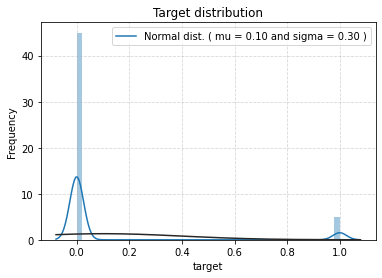

In [20]:
# Визуализация данных
from scipy import stats
from scipy.stats import norm

# Строим гистограмму и график плотности распределения целевой переменной
sns.distplot(train['target'], fit=norm)
mu, sigma = norm.fit(train['target'])
print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')
plt.grid(linestyle='--', alpha=0.5)
plt.legend([f'Normal dist. ( mu = {mu:.2f} and sigma = {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution')
plt.show()

**Выводы:**  

- целевая переменная состоит из 0 и 1 - это задача бинарной классификации  
- наблюдается явный дисбаланс классов, велика вероятность переобучения модели на примерах преобладающего класса

## Распределение признаков

**Задание 3:** Построить:  

- распределение признаков в зависимости от значения целевой переменной  
- распределение признаков для обучающей и тестовой выборки  
- сделать выводы  

(если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196)

In [32]:
features = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 'var_20', 'var_26', 'var_40', 'var_55', 
            'var_80', 'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 'var_196']

**Распределение признаков в зависимости от значения целевой переменной**

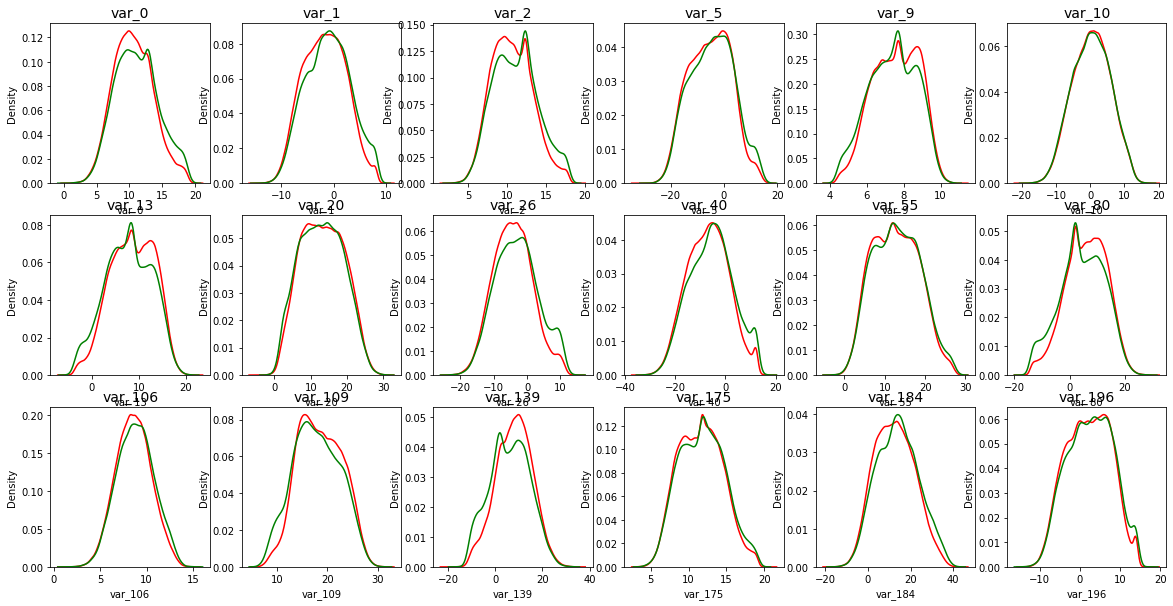

Wall time: 15.8 s


In [33]:
%%time

cols = 6
x = len(features)/cols
rows = round(x if int(x) == x else (x) + 0.5)

fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows))

for num, feature in enumerate(features):
    limit_bal_with_target = train[[feature, 'target']]
    limit_bal = limit_bal_with_target[feature]
    limit_bal_target_0 = limit_bal[limit_bal_with_target['target'] == 0]
    limit_bal_target_1 = limit_bal[limit_bal_with_target['target'] == 1]

    sns.kdeplot(limit_bal_target_0, ax=axes[num//cols, num%cols], label='0', color='r')
    sns.kdeplot(limit_bal_target_1, ax=axes[num//cols, num%cols], label='1', color='g')
    axes[num//cols, num%cols].set_title(feature, fontsize=14)

plt.show()

**Вывод:** наблюдаются признаки, которые имеют различные распределения в зависимости от значения целевой переменной, что может помочь при построение модели, т.к. существует некоторая функциональная зависимость.

**Распределение признаков для обучающей и тестовой выборки**

Wall time: 31.7 s


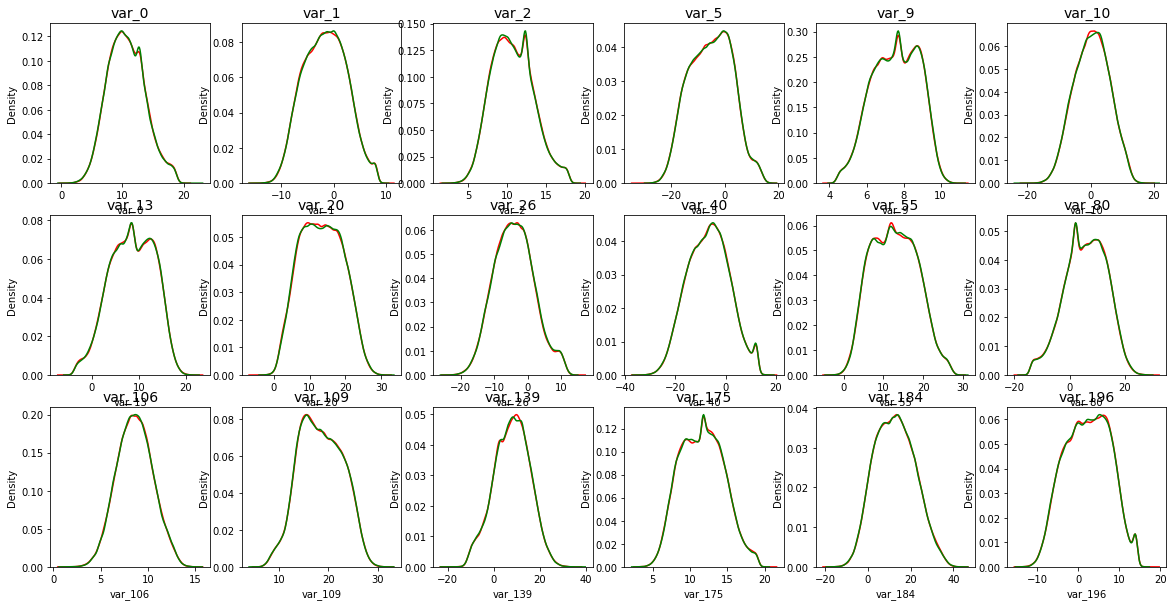

In [34]:
%%time

cols = 6
x = len(features)/cols
rows = round(x if int(x) == x else (x) + 0.5)

fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows)) 

for num, feature in enumerate(features):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//cols, num%cols], color="r", label="train")
        sns.kdeplot(test_data, ax=axes[num//cols, num%cols], color="g", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//cols, num%cols], color="blue", label="train")
    axes[num//cols, num%cols].set_title(feature, fontsize=14)

**Вывод:** рапределение признаков близко к нормальному, на обеих выборках распределение признаков схожее.

## Распределение основных статистик

**Задание 4:** Построить:  
- распределение основных статистик признаков (среднее, стандартное отклонение) в разрезе целевой переменной,
- распределение основных статистик обучающей и тестовой выборки,
- сделать выводы

**Среднее по фичам в разрезе целевой переменной**

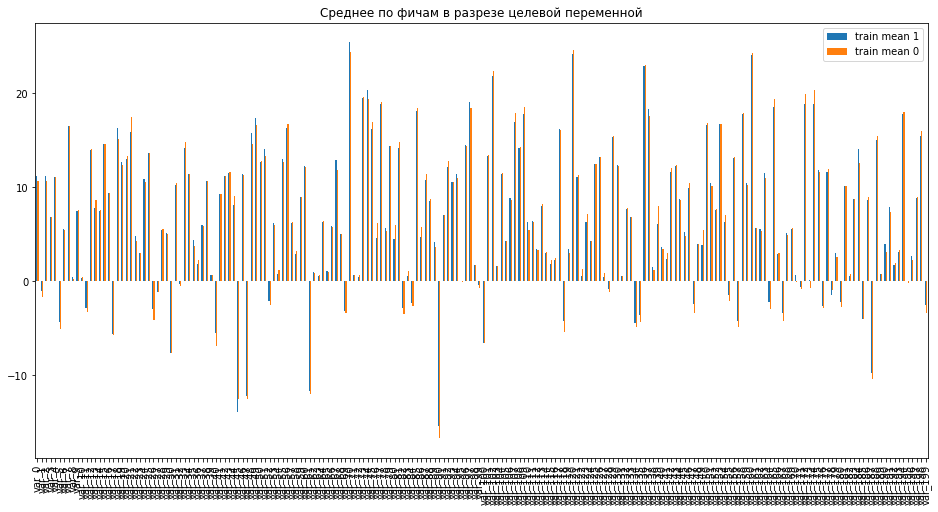

In [44]:
df = pd.DataFrame({
    # среднее по всем фичам трейна за исключением таргета
    'train mean 1': train.loc[train['target']==1, :].describe().iloc[1,1:],
    # среднее по всем фичам теста (здесь таргета нет)
    'train mean 0': train.loc[train['target']==0, :].describe().iloc[1,1:]
})

df.plot.bar(figsize=(16,8))
plt.title('Среднее по фичам в разрезе целевой переменной');

**Стандартное отклонение по фичам в разрезе целевой переменной**

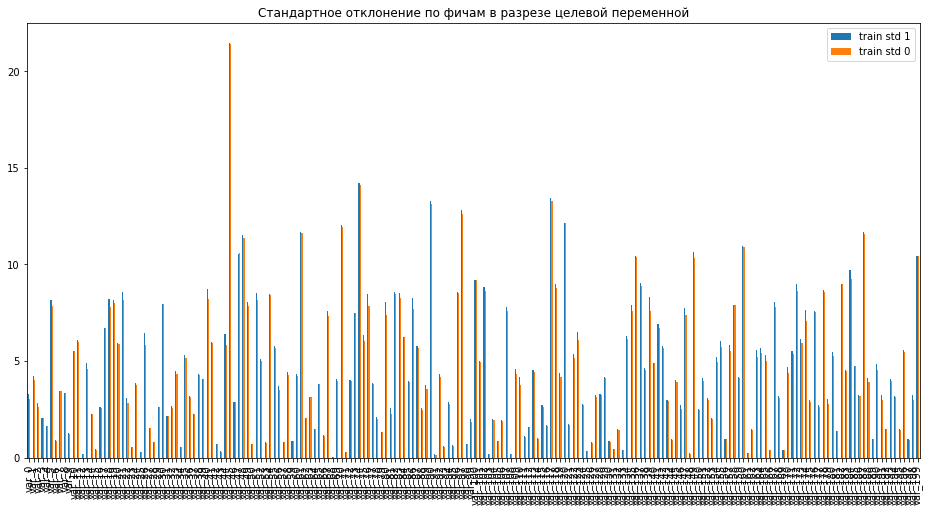

In [43]:
df = pd.DataFrame({
    # среднее по всем фичам трейна за исключением таргета
    'train std 1': train.loc[train['target']==1, :].describe().iloc[2,1:],
    # среднее по всем фичам теста (здесь таргета нет)
    'train std 0': train.loc[train['target']==0, :].describe().iloc[2,1:]
})

df.plot.bar(figsize=(16,8))
plt.title('Стандартное отклонение по фичам в разрезе целевой переменной');

**Распределение среднего по фичам обучающей и тестовой выборки**

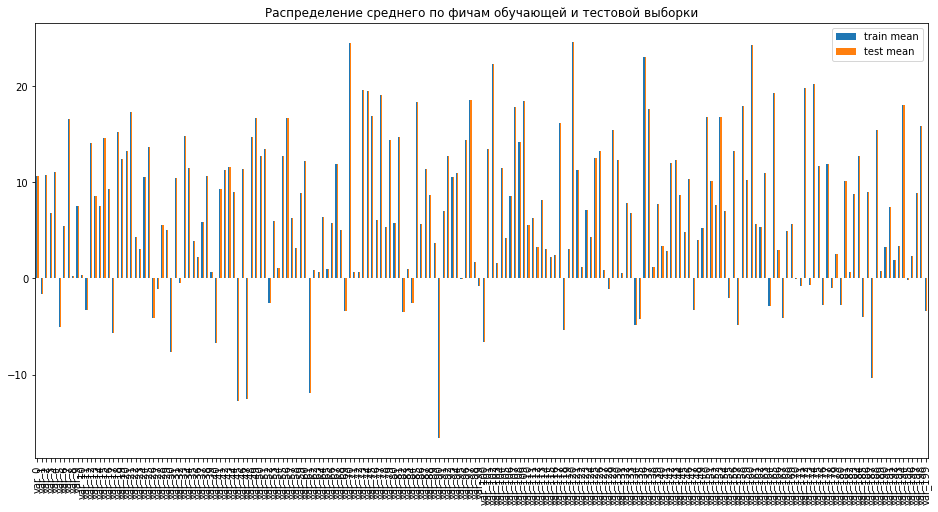

In [45]:
df = pd.DataFrame({
    # среднее по всем фичам трейна за исключением таргета
    'train mean': train.describe().iloc[1,1:],
    # среднее по всем фичам теста (здесь таргета нет)
    'test mean': train.describe().iloc[1,1:]
})

df.plot.bar(figsize=(16,8))
plt.title('Распределение среднего по фичам обучающей и тестовой выборки');

**Распределение средневадратичного отклонения по фичам обучающей и тестовой выборки**

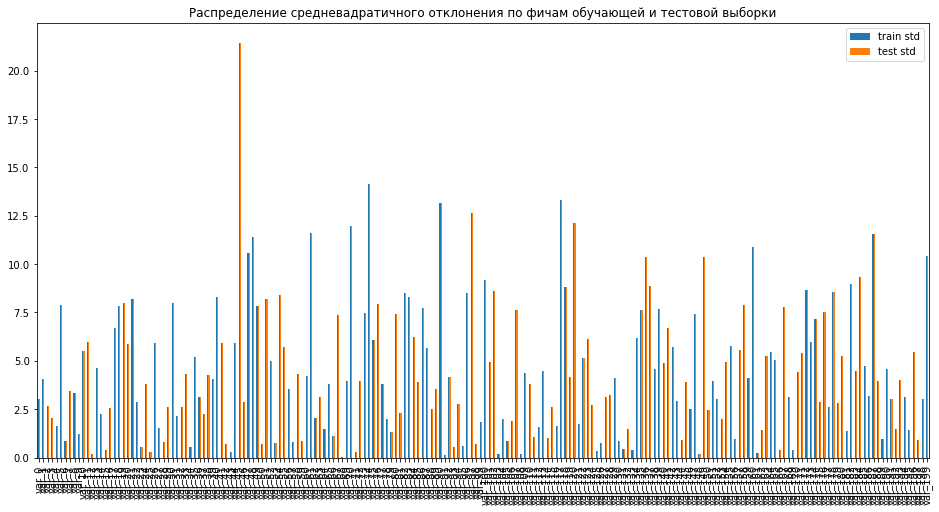

In [46]:
df = pd.DataFrame({
    # среднее по всем фичам трейна за исключением таргета
    'train std': train.describe().iloc[2,1:],
    # среднее по всем фичам теста (здесь таргета нет)
    'test std': train.describe().iloc[2,1:]
})

df.plot.bar(figsize=(16,8))
plt.title('Распределение средневадратичного отклонения по фичам обучающей и тестовой выборки');

**Вывод:** распределения основных статистик обеих выборок похожее.

## Распределение коэффициентов корреляции

**Задание 5:** Построить распределение коэффициентов корреляции между признаками.  
Есть ли зависимость между признаками? Будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2

**Корреляция между числовыми признаками**

In [49]:
# Выберем только числовые признаки
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")
numerical_features.columns

count of numeric_features 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [72]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

Text(0, 0.5, 'Density')

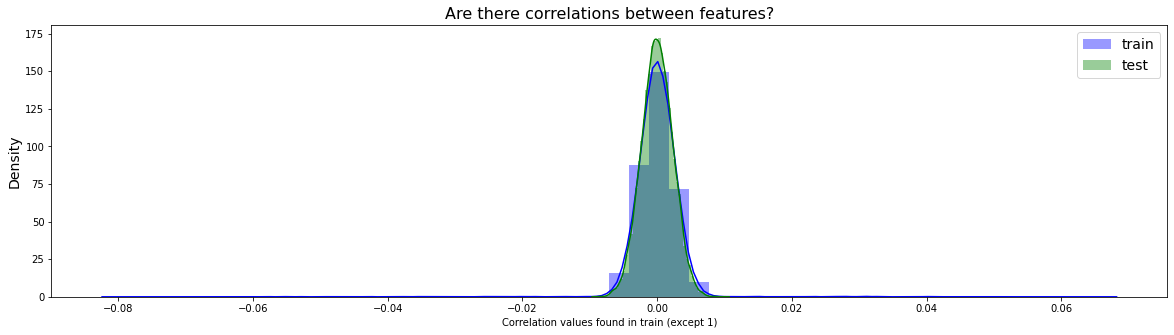

In [79]:
train_correlations = train.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)")
plt.title("Are there correlations between features?", size=16)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

**Correlation Heat Map**

<AxesSubplot:>

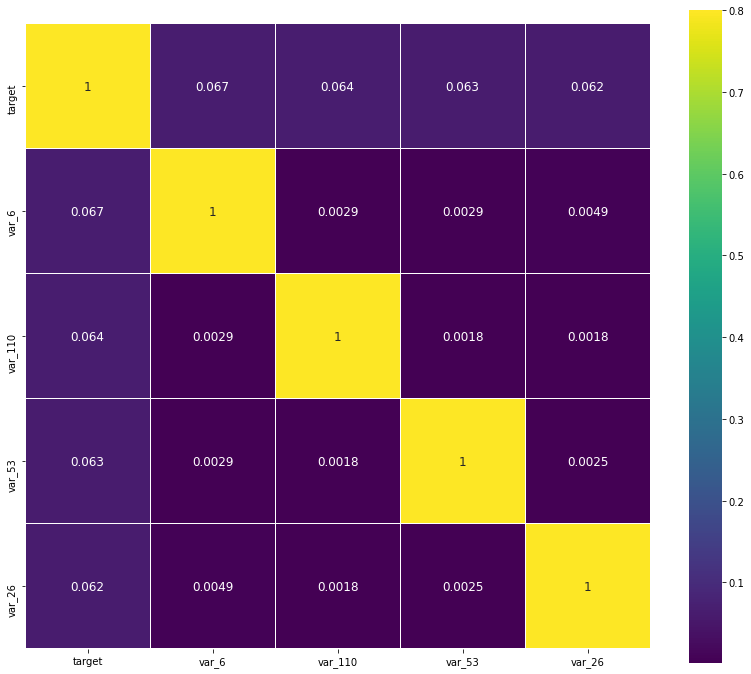

In [73]:
k = 5
cols = correlation.nlargest(k, "target")["target"].index
cm = np.corrcoef(train[cols].values.T)
fig, axes = plt.subplots(figsize = (14, 12))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

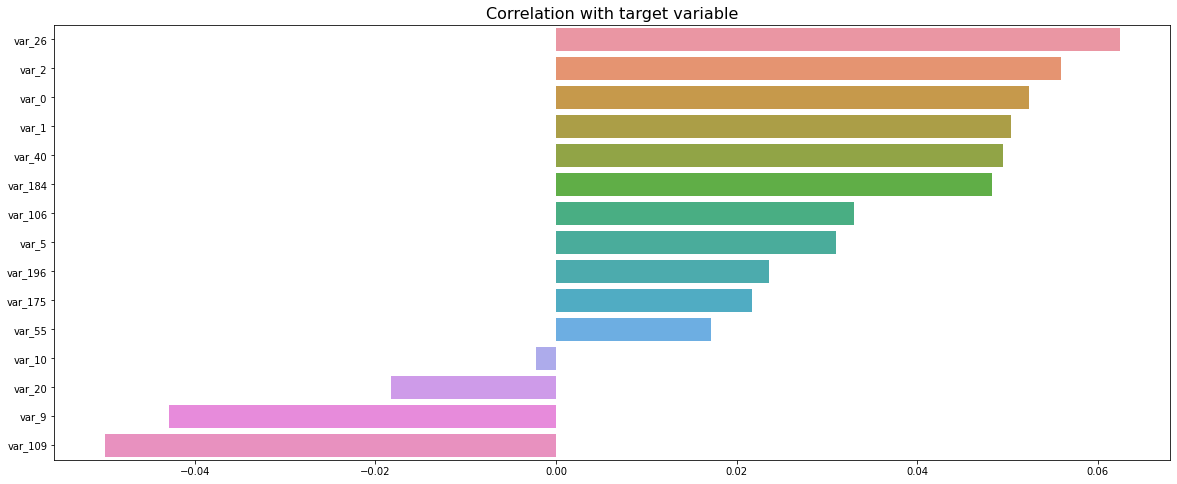

Wall time: 268 ms


In [78]:
%%time

top = 15
corr_with_target = train[features + ['target']].corr().iloc[:-1, -1].sort_values(ascending=False)
corr_with_target = corr_with_target.head(n=top)

plt.figure(figsize=(20, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable', size=16)
plt.show()

**Выводы:**  

- корреляции между признаками не наблюдается, т.е. нет линейной зависимости
- корреляция признаков с целевой переменной тоже отсутствует

## Нелинейная связь с таргетом

**Задание 6:** Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [80]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 8}

forest = RandomForestRegressor(**parameters)
forest.fit(train.drop(['target', 'ID_code'], axis=1), train['target'])

Wall time: 56.4 s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=8, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

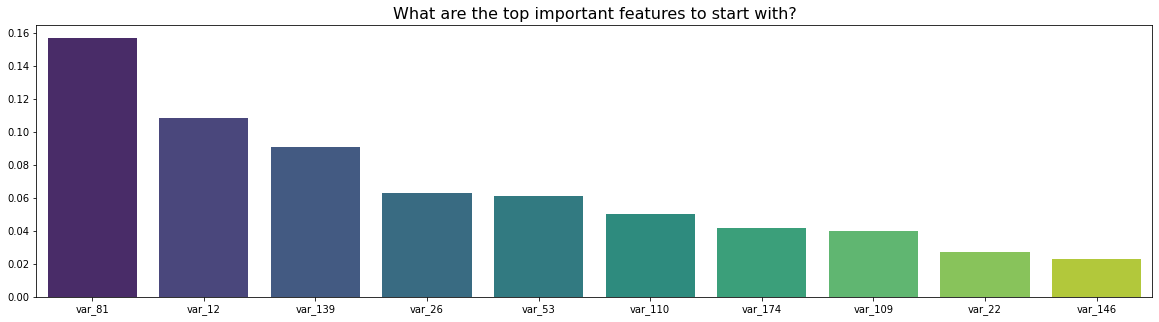

In [81]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = train.drop(['target', 'ID_code'], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=16)

## Идентичность распределения признаков

**Задание 7 (опция):** Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

In [82]:
features_to_score_train = train.drop(['target', 'ID_code'], axis=1).columns.tolist()
features_to_score_test = test.drop('ID_code', axis=1).columns.tolist()

X_adv = pd.concat([train[features_to_score_train], test[features_to_score_test]])
y_adv = np.hstack(
    (np.ones(train.shape[0]), np.zeros(test.shape[0])))
X_adv = X_adv.reset_index(drop=True)

In [83]:
%%time
parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 8}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring="roc_auc",
    cv=KFold(n_splits=3, shuffle=True, random_state=27)
)

print(f"CV-score: {round(np.mean(cv), 4)}")

[22:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV-score: 0.5116
Wall time: 1min 31s


[22:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

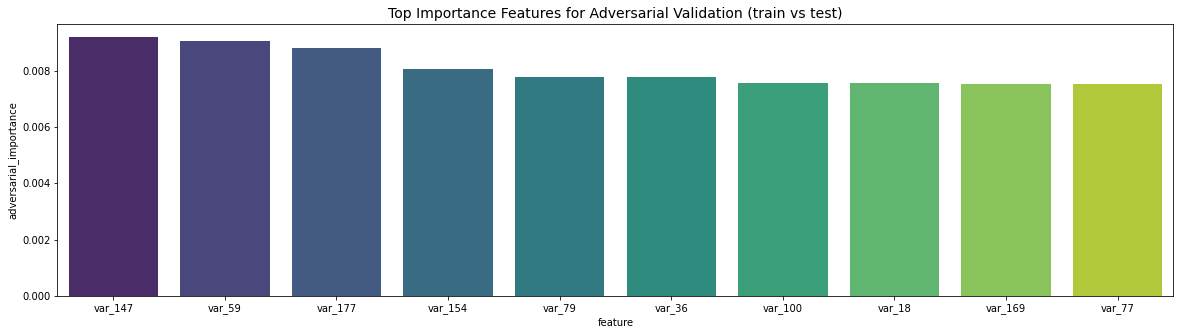

In [84]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)

**Вывод:** метрика roc_auc близка к 0.5 - значит результат клссификации близок к случайному, т.е. равен простому подбрасыванию монетки.